<div align="right"><sub>ID727 - Artificial Intelligence & Data Science (15 credits), Semester 1, 2024</sub>
</div>


# Assignment 2
Due Date: Friday, June 21st, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark. Total marks: 21 (100%).

### PLEASE INPUT YOUR NAME HERE: Declan de Haas

---

### Learning outcomes

- <font size="1">1.	Analyze the principles, advantages, limitations, applications and implications of data-driven artificial intelligence to be a productive and responsible practitioner.
</font>
- <font size="1">2.	Choose, implement and evaluate models to solve machine learning problems.</font>
- <font size="1">3.	Apply data science techniques to fetch, scrub, explore, manipulate, visualize, evaluate and interpret complex quantitative data.
</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import gc

In the following exercise you are supposed to train from scratch a simple two layer fully connected neural network to classify images of clothing, like sneakers and shirts. To do that, we will use a fashion dataset which contains 70,000 grayscale images in 10 categories. Each image shows individual articles of clothing at low resolution (28 by 28 pixels):

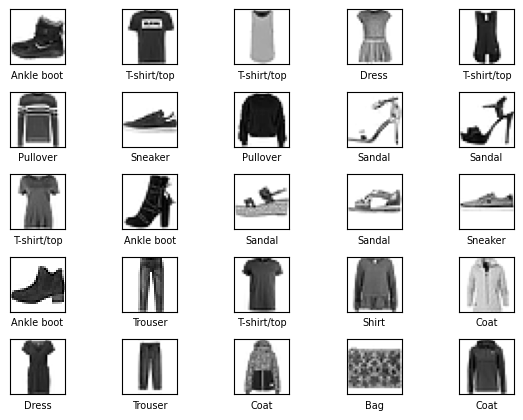

In [10]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#The data must be preprocessed before training the network. We can scale these values to a range of 0 to 1 before feeding them to the neural
#network model. To do that we simply divide by the maximum number in the data
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig=plt.figure(figsize=(7,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],fontsize=7)
fig.subplots_adjust(hspace=0.5)    
plt.show()

<a id="clothingExercise"></a>
#### 1. Create a simple 2-3 layers fully connected feed forward artificial neural network model (with roughly 100,000 parameters), train it on the fashion_mnist training data and estimate its performance on the test data. You should shoot for an accuracy above 80%. 

In [27]:
#SOLUTION
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

predictions = model(train_images[:1]).numpy()

tf.nn.softmax(predictions).numpy

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(train_labels[:1], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels, verbose=2)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7738 - loss: 0.6375
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3875
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8745 - loss: 0.3424
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3123
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2919
313/313 - 0s - 942us/step - accuracy: 0.8774 - loss: 0.3428


[0.34280866384506226, 0.8773999810218811]

## Text classification

The following script preprocesses a bunch of Tweets about different airlines in order to fit the data into a sentiment analysis model created in the next notebook cell. Don't worry about the technical details of this preprocessing, they are not necessary for the exercise.

In [4]:
# Basic packages
import pandas as pd 
import numpy as np
import tensorflow as tf
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.pyplot as plt

# Packages for data preparation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers


NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20  # Maximum number of words in a sequence

def remove_mentions(input_text):
    #Function to remove mentions, preceded by @, in a Pandas Series
    return re.sub(r'@\w+', '', input_text)

df = pd.read_csv('./Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_mentions)

X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print("Raw data set")
print(X_train)

print(X_train[0])

tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_oh = tk.texts_to_matrix(X_train, mode='binary')
X_test_oh = tk.texts_to_matrix(X_test, mode='binary')

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

# Train data samples: 13176
# Test data samples: 1464
Raw data set
6603      - I have spent 87 minutes (and counting) on h...
10773                          link didn't work via Mobil.
11027     We're having 2 grandbabies in 2 weeks -- will...
2216      I have requested upgrade for EWR BOM flight, ...
11611     thanks! It's hectic for everyone but their ac...
                               ...                        
2786      don't need your apologies, need my bag. Took ...
13791     Thank you for the response.  When I book I've...
10140     i ve been told that you get a percentage on e...
2784      Can't beat the storm out of town if you wait ...
7574      then this agent demanded I remove my old lugg...
Name: text, Length: 13176, dtype: object
 What  said.
Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('to', 7802), ('the', 5492), ('i', 4886), ('a', 4048), ('you', 3712)]
"neutral" is converted into 0
"0" is converted into [1. 0. 0.]
Shape

#### 2. What's wrong with the following model and its training? Provide a brief textual explanation. If there is something wrong, fix it and create a visualization that shows that you have improved the model and its training.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,615,955 (78.64 MB)

 Trainable params: 20,615,955 (78.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5957 - loss: 0.9180 - val_accuracy: 0.7162 - val_loss: 0.6406
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.7462 - loss: 0.5443 - val_accuracy: 0.7989 - val_loss: 0.5585
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9015 - loss: 0.3021 - val_accuracy: 0.8111 - val_loss: 0.5871
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.9540 - loss: 0.1582 - val_accuracy: 0.8005 - val_loss: 0.7912
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.9780 - loss: 0.0712 - val_accuracy: 0.7974 - val_loss: 0.8560
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.9906 - loss: 0.0381 - val_accuracy: 0.7997 - val_loss: 1.0183
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.9940 - loss: 0.0235 - val_accuracy: 0.8065 - val_loss: 1.0743
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.9951 - loss: 0.0179 - val_accuracy: 0.

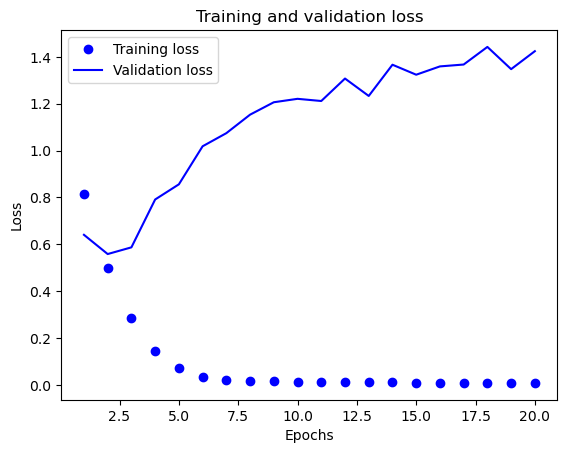

In [12]:
model = models.Sequential()

model.add(layers.Dense(2048, activation='relu', input_shape=(NB_WORDS,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train_rest,y_train_rest,
                    epochs=20,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,269,635 (88.77 MB)

 Trainable params: 23,269,635 (88.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5581 - loss: 5.1044 - val_accuracy: 0.6275 - val_loss: 2.1908
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.6411 - loss: 1.8831 - val_accuracy: 0.6889 - val_loss: 1.3491
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.7053 - loss: 1.1605 - val_accuracy: 0.7033 - val_loss: 1.0771
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.7458 - loss: 0.9010 - val_accuracy: 0.6958 - val_loss: 1.0177
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.7755 - loss: 0.7905 - val_accuracy: 0.7140 - val_loss: 1.1587
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.7796 - loss: 0.7461 - val_accuracy: 0.7071 - val_loss: 1.0779
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.7926 - loss: 0.6783 - val_accuracy: 0.6745 - val_loss: 0.9779
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.8017 - loss: 0.6331 - val_accuracy: 0.

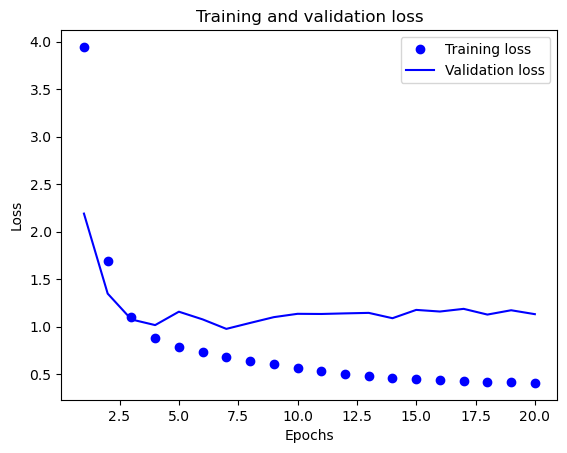

In [8]:
#SOLUTION

# The problem with the model is overfitting due to insufficient regularization. 

from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(2048, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train_rest,y_train_rest,
                    epochs=20,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid, y_valid),
                    verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 3. Build a convolutional neural network from scratch and train it on the fashion data set from the [Clothing recognition exercise](#clothingExercise). Don't worry about using a validation set. Just train on the training set and then estimate performance of the model on the test set. You should get a test set accuracy around or above 90%. Note how the convolutional neural network outperforms the fully connected network from the previous [Clothing recognition](#clothingExercise) Exercise 1.

In [2]:
#SOLUTION
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 32

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 32

train_labels[0:10]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0:10]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

test_acc

#### 4. Use an appropriate model to classify the following image (i.e. the output should be something along the lines of 'church'). Do not use a zero-shot classifier:
![](./images/church.jpg). 

In [9]:
#SOLUTION
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

from PIL import Image

image = Image.open("./images/church.jpg")

text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

out = model.generate(**inputs)

print(processor.decode(out[0], skip_special_tokens=True))

a photograph of the church


---

The file `princeton.csv` contains a small sample of text I gathered from Princeton University institutional web domain.

In [1]:
import pandas as pd
df=pd.read_csv('./princeton.csv',encoding="utf8")
df

,url,text
0,https://www.princeton.edu/,Health Professions Advising shows students mor...
1,https://www.princeton.edu/news/2018/04/10/jaco...,Jacobus Fellow Georgios Moschidis brings new i...
2,https://www.princeton.edu/news/2018/04/11/swam...,Chris Emery for the Office of Engineering Comm...
3,http://giving.princeton.edu,Taxing Times: What You Need to Know Now About ...
4,http://alumni.princeton.edu,Participate in a University- sponsored service...
...,...,...
11747,https://library.princeton.edu/staff/jmcgill,© 2018 The Trustees of Princeton University. A...
11748,https://library.princeton.edu/staff/ajarvis,© 2018 The Trustees of Princeton University. A...
11749,https://library.princeton.edu/department/organ...,Organizational Effectiveness Manager\r\n© 2018...
11750,https://library.princeton.edu/department/libra...,© 2018 The Trustees of Princeton University. A...


#### 5. Train a word2vec model on the corpus contained in the `text` column above . Use word embeddings of 100 dimensions, window size of 10 and only incorporate words in the model vocabulary that occur at least 10 times in the corpus.

* note that this is an extremely small corpus of text, "only" 43MB in size. Much better results would be obtain with larger corpora.

In [1]:
#SOLUTION
#!pip install gensim
import gensim
from gensim.models.word2vec import Word2Vec
import os
import pandas as pd
 
inputPath = os.path.normpath(r'.') 
fileName = './princeton.csv'                             
inputFilePath = os.path.join(inputPath, fileName)                
df=pd.read_csv(inputFilePath)
df.head()

from gensim.parsing.preprocessing import * #provides a number of convenience preprocessing functions optimized for speed
import csv
 
def preprocessing(file):
    CUSTOM_FILTERS = [lambda x: x.lower(), #To lowercase
                      lambda text: re.sub(r'https?:\/\/.*\s', '', text, flags=re.MULTILINE), #To Strip away URLs
                      strip_tags, #Remove tags from s using RE_TAGS.
                      strip_non_alphanum,#Remove non-alphabetic characters from s using RE_NONALPHA.
                      strip_punctuation, #Replace punctuation characters with spaces in s using RE_PUNCT.
                      strip_numeric, #Remove digits from s using RE_NUMERIC.
                      strip_multiple_whitespaces,#Remove repeating whitespace characters (spaces, tabs, line breaks) from s and turns tabs & line breaks into spaces using RE_WHITESPACE.
                      remove_stopwords, # Set of 339 stopwords from Stone, Denis, Kwantes (2010).
                      lambda x: strip_short(x, minsize=3), #Remove words with length lesser than minsize from s.
                     ]
 
    csv.field_size_limit(2147483647)
    with open(file,'r', newline='',encoding="utf-8") as inpFile:
 
        csvObject = csv.reader(inpFile, delimiter=',',quotechar='"')
 
        wordThreshold=5 #Important: filter out sentences with less than wordThreshold words
 
        sentences = []
        for csvEntry in csvObject:
            if len(csvEntry)>1:
                lines = csvEntry[1].split('\n') #csvEntry[0] is url csvEntry[1] is text Fetched from URL
 
                for line in lines: #Different elements appear in their own line
                    words = preprocess_string(line,CUSTOM_FILTERS)
 
                    if len(words)>wordThreshold: #Important: filter out sentences with less than wordThreshold words
                        sentences.append(words)
    wordsInCorpus=0
    for i, s in enumerate(sentences):
        wordsInCorpus += len(s)
    print("Number of words in corpus:",wordsInCorpus)
    print("Number of sentences in corpus:",len(sentences))
    return sentences
 
sentences = preprocessing(inputFilePath)

model = Word2Vec(sentences, # The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network
                 sg=0, #Defines the training algorithm. If 1, skip-gram is employed; otherwise, CBOW is used
                 vector_size=100,#Dimensionality of the feature vectors
                 window=10,# The maximum distance between the current and predicted word within a sentence
                 min_count=5, #Ignores all words with total frequency lower than this
                 workers=4, #Use these many worker threads to train the model (=faster training with multicore machines).
                 epochs = 5, # (int) – Number of iterations (epochs) over the corpus. //5
                )

model.wv.key_to_index

Number of words in corpus: 3614743
Number of sentences in corpus: 178390


{'princeton': 0,
 'university': 1,
 'students': 2,
 'research': 3,
 'new': 4,
 'program': 5,
 'read': 6,
 'science': 7,
 'said': 8,
 'work': 9,
 'student': 10,
 'center': 11,
 'professor': 12,
 'year': 13,
 'graduate': 14,
 'faculty': 15,
 'school': 16,
 'study': 17,
 'department': 18,
 'course': 19,
 'engineering': 20,
 'campus': 21,
 'office': 22,
 'public': 23,
 'time': 24,
 'information': 25,
 'studies': 26,
 'health': 27,
 'world': 28,
 'policy': 29,
 'international': 30,
 'history': 31,
 'american': 32,
 'class': 33,
 'edu': 34,
 'community': 35,
 'social': 36,
 'life': 37,
 'use': 38,
 'years': 39,
 'energy': 40,
 'courses': 41,
 'including': 42,
 'senior': 43,
 'art': 44,
 'college': 45,
 'service': 46,
 'national': 47,
 'project': 48,
 'undergraduate': 49,
 'library': 50,
 'environmental': 51,
 'researchers': 52,
 'award': 53,
 'academic': 54,
 'data': 55,
 'arts': 56,
 'people': 57,
 'include': 58,
 'prize': 59,
 'technology': 60,
 'members': 61,
 'physics': 62,
 'dean': 63,


#### 6. Print the vector/word embedding for the word `king`:

In [2]:
#SOLUTION
model.wv['king']

array([-1.1581632 , -1.0704753 ,  1.6270576 ,  0.9244681 ,  1.2762321 ,
        0.05019464,  1.2108369 ,  0.34353778, -1.2749633 , -0.3647172 ,
        1.5584921 ,  0.15946522, -1.987968  ,  1.246284  ,  0.9650951 ,
        1.3809459 , -0.61006826, -0.4940183 , -0.5200953 , -0.41980892,
        0.6325571 , -0.29292545,  2.6127577 ,  0.4619796 ,  2.4631865 ,
       -0.02692737,  0.30554873,  0.4563955 , -1.7756872 ,  0.27102485,
        0.67528886,  1.1967409 ,  1.5693985 , -2.877661  ,  0.67963856,
        1.4859815 , -0.05073007, -1.89147   ,  1.053882  , -0.743374  ,
       -0.2863753 ,  0.4904054 , -0.7964049 , -0.88130075,  1.4471706 ,
        0.6373164 , -0.27555847,  0.8898217 ,  2.3071043 ,  0.8842518 ,
        0.30168825, -0.15013362,  0.05102403,  0.36943987,  0.9993612 ,
       -0.7318161 , -1.1854829 , -0.5973109 ,  0.09227128,  0.4658885 ,
       -0.7103931 , -0.53205305, -0.01338434, -0.4780404 , -0.8450599 ,
        1.1265551 ,  1.1259735 , -0.5290549 ,  0.8078384 , -0.26

#### 7. What are the top 10 most similar words to the word `bike`? 

In [3]:
#SOLUTION
model.wv.most_similar(positive=['bike'])

[('buses', 0.9017051458358765),
 ('bicycle', 0.9002918004989624),
 ('bikes', 0.8983832597732544),
 ('ride', 0.8700186610221863),
 ('tigertransit', 0.8678204417228699),
 ('rent', 0.8510571718215942),
 ('bus', 0.8407108187675476),
 ('commute', 0.8296831846237183),
 ('parking', 0.8280355930328369),
 ('bicycles', 0.8267155289649963)]

#### 8. What is the cosine similarity between the words `programmer` and `software`? 

In [4]:
#SOLUTION
model.wv.similarity('programmer','software')

0.34182715

#### 9. What are the closest vectors to the result of adding the vectors for `disease` and `brain`?

In [5]:
#SOLUTION
des_vect = model.wv['disease']
brain_vect = model.wv['brain']

comb_vect = des_vect + brain_vect

model.wv.most_similar(positive=[comb_vect])

[('brain', 0.8677951693534851),
 ('disorders', 0.8138030767440796),
 ('disease', 0.812362790107727),
 ('diseases', 0.7775356769561768),
 ('neurological', 0.7711328268051147),
 ('developmental', 0.7659751772880554),
 ('autism', 0.7600375413894653),
 ('neuronal', 0.7511895298957825),
 ('neural', 0.7441613078117371),
 ('aging', 0.7435911297798157)]

#### 10. Use your model to guess an answer to the following analogy: `Madrid is to Spain as London is to...`

In [6]:
#SOLUTION
model.wv.most_similar(positive=['spain','london'], negative=['madrid'])

[('england', 0.7354947924613953),
 ('jerusalem', 0.6491923928260803),
 ('british', 0.6471990942955017),
 ('france', 0.6434648036956787),
 ('translated', 0.6424615979194641),
 ('bible', 0.6203447580337524),
 ('translations', 0.6139138340950012),
 ('ireland', 0.6111671924591064),
 ('oxford', 0.6097078323364258),
 ('rome', 0.6083114147186279)]

#### 11. Plot the word embeddings in 2D after applying t-SNE dimensionality reduction for the following words:
```
biology, chemistry, history, literature, lecturer, professor, undergraduates, students, swimming, running, rowing
```

C:\Users\caugdi1\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


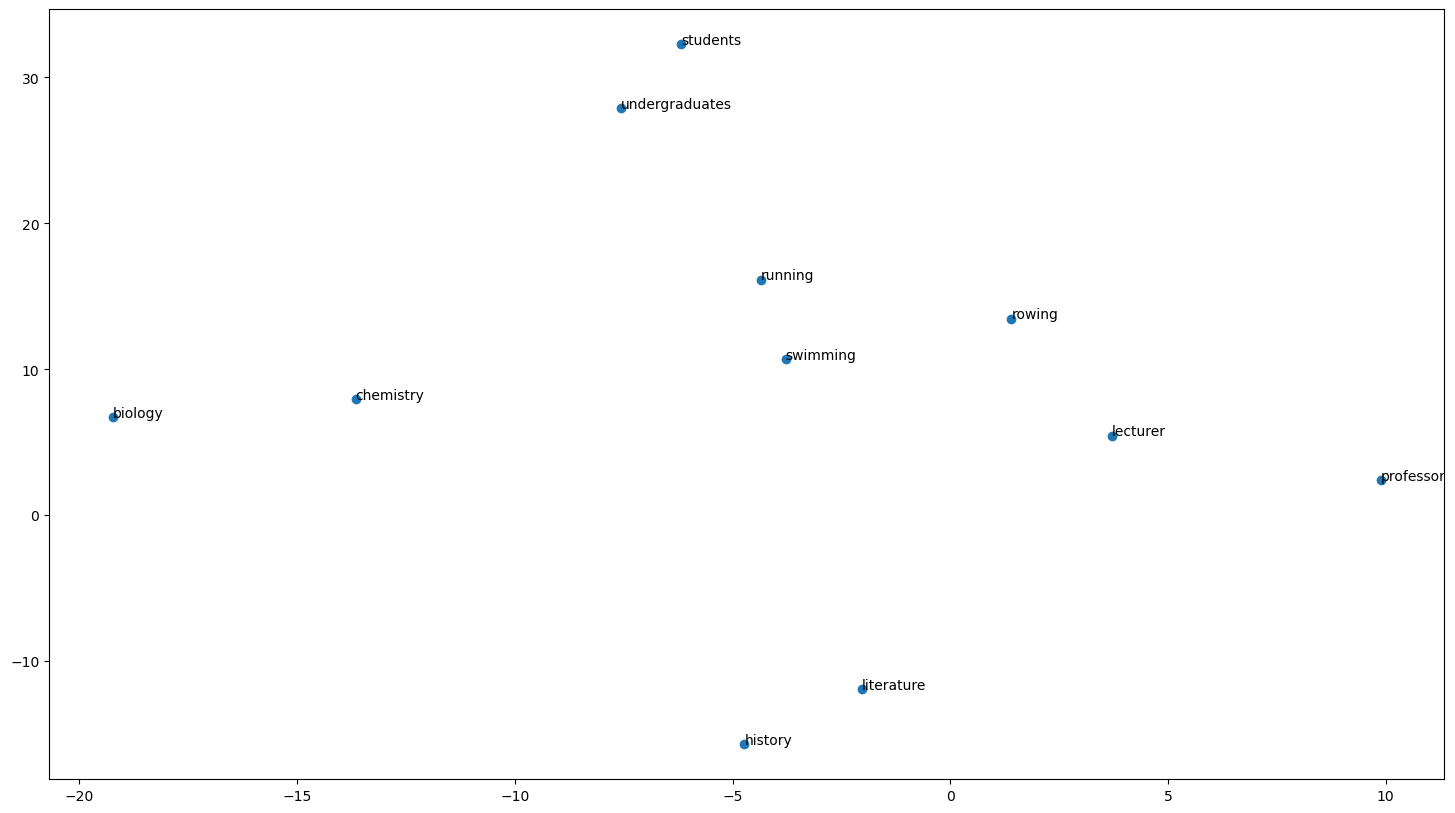

In [7]:
#SOLUTION

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 
d= {}
 
d['biology']=model.wv['biology']
d['chemistry']=model.wv['chemistry']
d['history']=model.wv['history']
d['literature']=model.wv['literature']
d['lecturer']=model.wv['lecturer']
d['professor']=model.wv['professor']
d['undergraduates']=model.wv['undergraduates']
d['students']=model.wv['students']
d['swimming']=model.wv['swimming']
d['running']=model.wv['running']
d['rowing']=model.wv['rowing']

 
vocab = list(d)
 
X = model.wv[vocab]
 
tsne = TSNE(perplexity=3, n_components=2, learning_rate=1, init='random', random_state=3, n_iter=2000)
X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis=1)
df.columns = ['x', 'y', 'word']

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))

plt.show()

## Sentence Embeddings

#### 12. The file 'nzherald.csv' contains a bit over 1,000 news articles headlines from the New Zealand Herald published in 2022. Using sentence embeddings embed all the headlines into vector space and then create a function that takes in a query (for example "heavy rain") and performs semantic search over the embedded headlines to return the top 10 most semantically similar headlines alongside their cosine similarity metric. That is, the output should be something along these lines:

- Thunderstorms, heavy rain, strong winds and sticky temperatures ushers in wild weekend 0.5373919606208801
- Wild weather: Storm lashes NZ, month of rain forecast to fall 0.5163007974624634
- Weather: Storm alert - Weekend gales, rain, Wellington gets wet Saturday night 0.5113559365272522
- Wild weather: Two-day deluge to bring heavy rain to flood-ravaged North Island region 0.5090016722679138
- Weather: Experts explain reason behind North Shore waterspout and recent muggy thunderstorms 0.46649590134620667
- Weather: Aucklanders fascinated by gravity wave cloud formations after week of rain 0.4622672200202942
- Temperatures to plunge as snow, rain slam New Zealand head of school holidays 0.40094342827796936
- Pakistan flooding deaths pass 1000 in deadly monsoon season 0.3898913860321045
- Gales, rain continue: South Island weather warning may be upgraded to Red 0.3666769862174988
- Wild weather, Levin tornado: Up to 50 homes damaged, one person injured by glass 0.3390536308288574


In [3]:
#SOLUTION
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

df = pd.read_csv('./nzherald.csv', encoding="utf8")

query = "heavy rain"
results = []

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

headlines = df['headline'].tolist() 
headlines_embeddings = model.encode(headlines, convert_to_tensor=True)

def semantic_search(query, top_k=10):
    query_embedding = model.encode(query, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(query_embedding, headlines_embeddings)[0]
    
    # Get the top_k results
    top_results = torch.topk(cosine_scores, k=top_k)
    
    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        results.append((headlines[idx], score.item()))
    
    return results
    
results = semantic_search(query)

for headline, score in results:
    print(f"{headline} {score}")

C:\Users\caugdi1\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Wild weather: Two-day deluge to bring heavy rain to flood-ravaged North Island region 0.6651418209075928
Thunderstorms, heavy rain, strong winds and sticky temperatures ushers in wild weekend 0.6107338070869446
Wild weather: Storm lashes NZ, month of rain forecast to fall 0.5498343706130981
Weather: Storm alert - Weekend gales, rain, Wellington gets wet Saturday night 0.4942616820335388
Weather: Experts explain reason behind North Shore waterspout and recent muggy thunderstorms 0.4806540608406067
Weather: Aucklanders fascinated by gravity wave cloud formations after week of rain 0.47213709354400635
Temperatures to plunge as snow, rain slam New Zealand head of school holidays 0.3742246627807617
Wild weather, Levin tornado: Up to 50 homes damaged, one person injured by glass 0.3450486660003662
Unsettled weather drives cut in Trustpower earnings guide 0.3312986195087433
Cricket: Rain sees Black Caps and India settle for tie 0.32037150859832764


## Transformers

#### 13. Use an appropriate transformer model from the Hugging Face Hub to carry out NER (Name Entity Recognition) over the following text:

In [5]:
text="""
Micron MU 1.87%increase; green up pointing triangle Technology said it would invest around $3.6 billion in advanced memory-chip making in Japan, aided by support from the Japanese government.

The agreement was announced Thursday in Japan ahead of a summit by leaders of the Group of Seven industrialized democracies in Hiroshima starting Friday. Micron said it would make cutting-edge memory chips that spring from the investment starting in 2025. 

The deal comes at a time of rising tension between the U.S. and China over chip technology. The U.S. has imposed waves of restrictions that are aimed at slowing China’s ability to become a cutting-edge producer of semiconductors that underpin countries’ technical prowess and military advancement. 

America’s ambassador to Japan, Rahm Emanuel, was closely involved in crafting the deal that is being held up as an example of the G-7 responding to China’s economic clout.

“From securing a critical part of the semiconductor sector to unambiguous response to coercion, the investment is example A of USA-Japan strategic partnership,” Emanuel said. 

Micron has been at the center of some of the geopolitical tension between Washington and Beijing. The company faces a cybersecurity review in China that could lead to its expulsion from that market, which supplied about 11% of its sales in its latest financial year. Unlike most other kinds of chips, memory chips are largely interchangeable and trade like commodities, making it less risky for China to ban a memory producer because substitutes can be found with relative ease.

The company is also one of several in the chip industry that has been trying to dial back on near-term spending in reaction to a global slump for processors, while preserving investments needed for what is expected to be long-term growth demand for integrated circuits. Micron last year said it was cutting capital expenditures, while proceeding with plant expansion plans.  

A global semiconductor shortage during the first couple of years of the pandemic bolstered interest in numerous governments to subsidize local chip production. The U.S. has allocated roughly $53 billion to foster local chip production and research over the coming years. The European Union also wants to fund more chip work within its region. 

Micron last year announced its intention to build a massive chip manufacturing plant in Clay, N.Y., saying it will ultimately invest up to $100 billion in the facility. President Biden visited the location last year as part of his effort to show his administration was bringing advanced chip manufacturing back to the U.S. and called the company’s plans there “one of the most significant investments in American history.”

In Japan, Micron said it plans to purchase and install at its factory in Hiroshima some of the most advanced chip-making machinery in the world: so-called EUV lithography equipment. Those machines help map out ultratiny transistors onto the slaps of silicon that chips are made of. The machines, made exclusively by Dutch company ASML, cost hundreds of millions of dollars each and are crucial to producing the world’s most advanced chips. 

The EUV machinery Micron expects to buy with its Japanese investment would be the first in the country, and would extend a government-led effort to bolster its chip industry. Micron said it plans to produce the advanced chips in Japan and Taiwan. 

Taiwan Semiconductor Manufacturing Co., the world’s largest contract chip maker, said last year that it would spend more than $8 billion on expansion in Japan. It has since added to those ambitions. Tokyo last July also promised to subsidize production at the country’s largest chip plant, a joint venture of memory makers Kioxia and Western Digital.

Japan also last year formed a new chip company called Rapidus, supported by a consortium of leading domestic technology firms.

On Thursday, Prime Minister Fumio Kishida met top global semiconductor executives at his office, including Intel Chief Executive Officer Patrick Gelsinger, Micron CEO Sanjay Mehrotra and Mark Liu, president of TSMC.  

Japan has invested in Micron’s production before. The country last year said it would give the company up to about $338 million to make advanced chips at the Hiroshima plant. That investment came on the heels of a visit to the country by Vice President Kamala Harris.
"""



In [7]:
#SOLUTION
from transformers import pipeline

ner_pipe = pipeline("ner")

for entity in ner_pipe(text):
    print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

C:\Users\caugdi1\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\caugdi1\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

{'entity': 'I-ORG', 'score': 0.95633805, 'index': 1, 'word': 'Micro', 'start': 1, 'end': 6}
{'entity': 'I-ORG', 'score': 0.9231879, 'index': 2, 'word': '##n', 'start': 6, 'end': 7}
{'entity': 'I-LOC', 'score': 0.9998641, 'index': 33, 'word': 'Japan', 'start': 139, 'end': 144}
{'entity': 'I-MISC', 'score': 0.99912995, 'index': 40, 'word': 'Japanese', 'start': 172, 'end': 180}
{'entity': 'I-LOC', 'score': 0.9998522, 'index': 49, 'word': 'Japan', 'start': 234, 'end': 239}
{'entity': 'I-ORG', 'score': 0.83232045, 'index': 58, 'word': 'Group', 'start': 276, 'end': 281}
{'entity': 'I-ORG', 'score': 0.9813076, 'index': 59, 'word': 'of', 'start': 282, 'end': 284}
{'entity': 'I-ORG', 'score': 0.78396887, 'index': 60, 'word': 'Seven', 'start': 285, 'end': 290}
{'entity': 'I-LOC', 'score': 0.9995278, 'index': 68, 'word': 'Hiroshima', 'start': 321, 'end': 330}
{'entity': 'I-ORG', 'score': 0.99745506, 'index': 72, 'word': 'Micro', 'start': 348, 'end': 353}
{'entity': 'I-ORG', 'score': 0.99306, 'ind

#### 14. Fine tune a `distilbert-base-cased` Transformer model for 1 epoch using the Transformers library from Hugging Face on a data set of  financial sentiment located in `financial.csv`. Split the data into 80% train, 10% evaluation and 10% test. Save the model after fine-tuning. Then, load the model and estimate its performance on the test set. Finally, predict the financial sentiment of the sentence: 
`Financial scandal at Megacorp makes it file for bankruptcy protection`

In [1]:
#Startup code to transform csv data into HuggingFace dataset
import pandas as pd
from datasets import Dataset, DatasetDict
df=pd.read_csv('./financial.csv',encoding='utf-8')
df.columns = ['text','label']
df['label'] = df['label'].replace(['negative','neutral','positive'],[0,1,2]) # model requires numerical labels
# df.to_csv('./financial2.csv',index=False)
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 948
})

In [5]:
# SOLUTION


#### 15. Create a system that given an input image is able to retrieve its closest analogue in a set (i.e. database) of 10 images. You are not allowed to use a zero-shot classifier and string matching. The search should be done in latent space. For the fake database of images use the 10 images in the folder `images_set`.  For testing the system use the image: `./images/salad_query.jpg`. Make sure you are able to retrieve the closes image in `images_set` to `./images/salad_query.jpg`. Tip: think in terms of vector space (i.e. latent space).

C:\Users\caugdi1\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\caugdi1\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Closest image: salad.jpeg with similarity: 0.8962036371231079


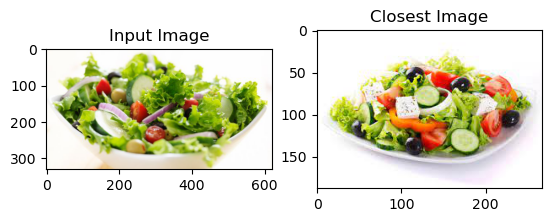

In [11]:
#SOLUTION
from PIL import Image
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

def load_images(image_folder):
    images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_folder, filename)
            images.append((filename, Image.open(img_path).convert('RGB')))  # Convert image to RGB
    return images

input_image_path = './images/salad_query.jpg'
images_folder = './images_set'

input_image = Image.open(input_image_path).convert('RGB')  # Convert image to RGB
images_set = load_images(images_folder)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

model = models.resnet50(pretrained=True)
model.eval()
model = torch.nn.Sequential(*list(model.children())[:-1])

def extract_features(image, model, transform):
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image).squeeze().numpy()
    return features

input_image_features = extract_features(input_image, model, transform)

images_set_features = []
for filename, img in images_set:
    features = extract_features(img, model, transform)
    images_set_features.append((filename, features))

def find_closest_image(input_features, set_features):
    similarities = []
    for filename, features in set_features:
        similarity = cosine_similarity([input_features], [features])
        similarities.append((filename, similarity[0][0]))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[0]

closest_image_filename, closest_similarity = find_closest_image(input_image_features, images_set_features)

closest_image = next(img for filename, img in images_set if filename == closest_image_filename)

print(f"Closest image: {closest_image_filename} with similarity: {closest_similarity}")

plt.figure()
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image)

plt.subplot(1, 2, 2)
plt.title('Closest Image')
plt.imshow(closest_image)

plt.show()

#### 16. Use OpenAI API chat completion endpoint to summarize the text in `text_to_summarize.txt` to no more than 100 words. Use the 'gpt-3.5-turbo' model, a temperature of 0.1 and penalize new tokens based on whether they appeared in the text so far.

In [9]:
#SOLUTION
from openai import OpenAI
import pandas as pd
import os

API_KEY='sk-proj-QedbL5zQqXcLSaAj1LzFT3BlbkFJom6kNBH1FjRg0BqyPGfu'
client = OpenAI(api_key=API_KEY)

with open('./text_to_summarize.txt', 'r', encoding='utf-8') as file:
    text_to_summarize = file.read()

prompt = f"Summarize the following text in no more than 100 words:\n\n{text_to_summarize}"

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt},
    ],
    max_tokens=150,
    temperature=0.1,
    frequency_penalty=0.1,
)

summary = response.choices[0].message.content

# Print the summary
print("Summary:")
print(summary)

Summary:
Americans have shifted their focus away from high inflation, with only 9% now considering it a top concern. However, this may indicate a dangerous acceptance of sustained high inflation. While overall inflation has decreased to 4.9%, core inflation remains high at 5.5%. Factors that initially drove inflation, such as supply chain disruptions and stimulus measures, have eased. Yet, there are concerns that persistent inflationary pressures are becoming embedded in pricing and wage-setting behaviors. The longer inflation remains elevated, the harder it may be to bring it back down to the Federal Reserve's target of 2%.


#### 17. Use OpenAI API Images endpoint to edit the image `dog.png` so that the dog is sticking his tongue out.

In [1]:
#SOLUTION
from openai import OpenAI
from IPython.display import Image, display

API_KEY='sk-proj-QedbL5zQqXcLSaAj1LzFT3BlbkFJom6kNBH1FjRg0BqyPGfu'
client = OpenAI(api_key=API_KEY)

image_dog = './images/dog.png'
image_mask = './images/mask.png'

response = client.images.edit(
    model="dall-e-2",
    image=open(image_dog, "rb"),
    mask=open(image_mask, "rb"),
    prompt="dog is sticking his tongue out",
    n=1,
    size="1024x1024"
    
)

edited_image_url = response.data[0].url

edited_image_url
display(Image(url=edited_image_url))

#### 18. Fine-tune an OpenAI `gpt-3.5-turbo` model for 2 epochs and with a 0.1 learning rate using the `financial.csv` data set so the fine tuned model is able to classify the sentiment of financial comments as `positive`, `negative` or `neutral`.

In [45]:
#SOLUTION


In [20]:
# testing performance of the model on the following sentences
prompts=["the company went bankrupt",
        "the company posted record profits",
        "the board of directors announced a new CEO for the company"]
    

## LangChain

#### 19. The file `op.csv` contains text scraped from Otago Polytechnic website. Use the LangChain framework to create a question answering system where a user can enter questions about Otago Polytechnic and the system will provide appropriate responses derived from the content of the file `op.csv`. Make sure you use a vector store to ingest the documents and that you retriever QA system operates leveraging that vector store. For ease of use, I suggest Chroma vector store. If you do have a GPU and `CUDA` library installed, ingestion of the documents into vector space migh take a long time, if you get impatient, just use a smaller portion of the documents (i.e. 10%) to speed things up (accuracy of the system will go down though)

Some example questions for the testing the system could be:
- What can I study at Otago Polytechnic?
- What skills will I learn while studying the bachelor of information technology?
- Where is Otago Polytechnic located?
- Is distance education a possibility when studying at Otago Polytechnic?
- What sort of research is being done at Otago Polytechnic?

In [44]:
#SOLUTION


In [21]:
#TEST
prompt="What can I study at Otago Polytechnic?"

#### 20. Create an agent using the LangChain framework that is able to interact with a user and provide up to date answers combining state-of-the-art LLMs and Google searches. That is, I should be able to ask the system questions such as:
"What do the latest political polls in New Zealand suggest?"
#### and the system should provide a meaningful an up-to-date response. You might want to create an account with https://serper.dev/ to get 1000 free google API queries. Use them sparsely so you don't run out while working on this exercise.

In [10]:
# SOLUTION


In [23]:
#TEST
query = "What do the latest political polls in New Zealand suggest?"

# Deliverables

#### 21. Hand in a single python notebook file (.ipynb). Do not include any data sets in your GitHub repository!!! Use separate code cells to organize your code. Name your Python notebook according to the following pattern: *yourLastName_AI_A2.ipynb*. Create your own private repository for you to work on the Assignment by using the following link: 
[https://classroom.github.com/a/GiHobp4d](https://classroom.github.com/a/GiHobp4d)

The notebook file should be available in your own private GitHub repository “https://github.com/OPClasses2/assessment-2-YourGithubUserName” and I will be able to fetch it from there. 

---